<a href="https://colab.research.google.com/github/EyimofeP/weight-height-linear-regression/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression Model to Predict Body Mass Index from Weight(kg)

In [1]:
# Import Pandas
import pandas as pd

In [2]:
# Import dataset
url = "https://raw.githubusercontent.com/EyimofeP/weight-height-linear-regression/main/height_weight.csv"

model_df = pd.read_csv(url)

In [3]:
model_df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


Index Stands for Body Mass Index(BMI), Let make another column showing the categorical string values of this numbers

In [4]:
data_index = {0: "Extremely Weak", 1: "Weak", 2: "Normal", 3: "Overweight", 4: "Obesity", 5 :"Extreme Obesity"}

In [5]:
model_df["BMI"] = model_df.Index.map(data_index)

Let us check the statistics of this dataset, there seems to be no missing values, so data cleaning is required

In [6]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
 4   BMI     500 non-null    object
dtypes: int64(3), object(2)
memory usage: 19.7+ KB


As we can see there is a high relationship between weight and body mass index


In [7]:
model_df.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


## Exploratory Data Analysis

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
model_df.head()

,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


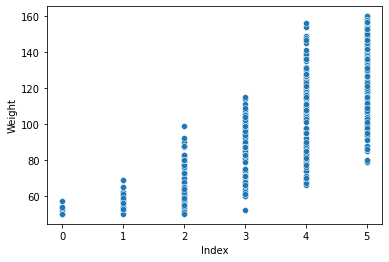

In [12]:
sns.scatterplot(x="Index", y="Weight", data=model_df);

From the plot below, we can see that most people are in extreme obesity


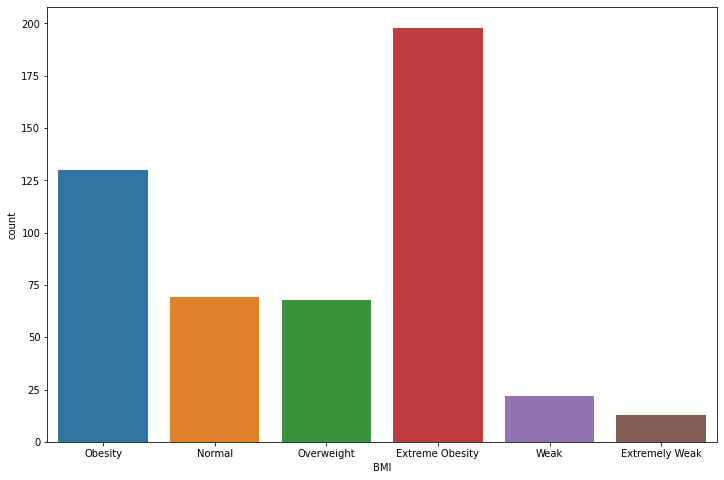

In [18]:
plt.figure(figsize=[12,8])
sns.countplot(x="BMI", data=model_df)

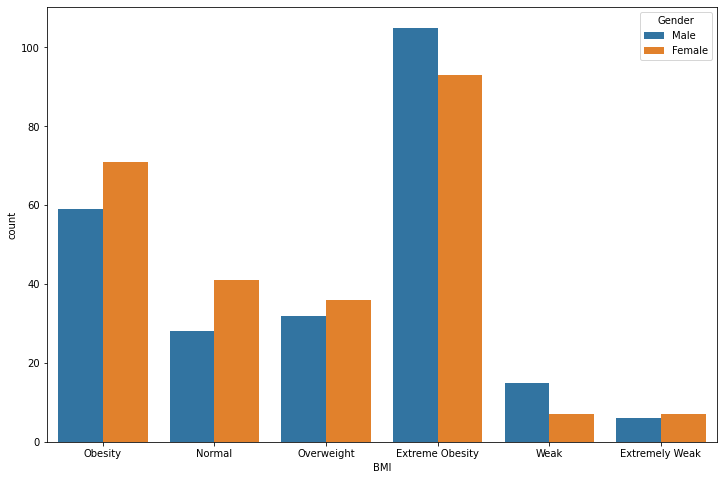

In [20]:
plt.figure(figsize=[12,8])
sns.countplot(x="BMI", data=model_df, hue="Gender")

Okay now lets run Linear Regression on the dataset

## Split the Data into feature and target

In [21]:
Y = model_df.Index
Y

0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64

In [27]:
X = model_df.Weight.to_frame()
X

,Weight
0,96
1,87
2,110
3,104
4,61
...,...
495,153
496,121
497,136
498,95


## Split Data into Train and Test into 80/20



In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Lets check the dimension of our data

In [31]:
X_train.shape, Y_train.shape

((400, 1), (400,))

In [33]:
X_test.shape, Y_test.shape

((100, 1), (100,))

**Linear Regression Model**

Import the library

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Instantiate Regression model using Ordinary Least Squares method

In [35]:
model = LinearRegression()

Train the data and fit the line

In [36]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Make Prediction

In [37]:
prediction = model.predict(X_test)

Checking Model Performance

In [42]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, prediction))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, prediction))


Coefficients: [0.03303517]
Intercept: 0.2518064148033403
Mean squared error (MSE): 0.67
Coefficient of determination (R^2): 0.65


So the formula of the regression is 

> **y = mx + b**

> **Index = 0.03303517(Weight) + 0.2518064148033403**





So a 63.5 kg person, 31.8 kg person and a 89kg person each have a BMI of Normal, Weak and Overweight respectively

In [64]:
import numpy as np

people = np.array([[63.5], [31.8], [89]])
model.predict(people)

array([2.34953945, 1.30232469, 3.19193618])

Comparing Test Data with Prediction Data

In [57]:
np.array(Y_test)

array([5, 3, 5, 1, 5, 5, 2, 4, 1, 5, 4, 2, 5, 5, 0, 5, 2, 2, 4, 2, 3, 5,
       4, 2, 4, 3, 4, 4, 1, 4, 4, 5, 4, 4, 4, 5, 5, 4, 4, 5, 5, 4, 2, 1,
       4, 4, 1, 5, 5, 2, 5, 5, 3, 5, 4, 4, 2, 3, 3, 4, 2, 4, 3, 5, 2, 5,
       3, 5, 2, 5, 5, 5, 5, 4, 1, 4, 4, 4, 2, 5, 2, 5, 0, 5, 1, 2, 5, 5,
       4, 2, 5, 5, 4, 2, 4, 5, 4, 2, 4, 3])

In [69]:
# Rounding Prediction Values into their nearest integers, since BMI is an integer not a float
round_prediction = np.rint(prediction).astype(int)
round_prediction

array([6, 2, 5, 2, 4, 5, 3, 4, 3, 3, 4, 2, 4, 5, 2, 4, 3, 2, 4, 3, 4, 5,
       4, 2, 4, 2, 3, 4, 2, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 5, 5, 4, 3, 2,
       4, 4, 2, 5, 5, 2, 5, 5, 4, 5, 4, 5, 3, 3, 3, 3, 3, 3, 4, 4, 2, 4,
       4, 4, 2, 5, 5, 4, 3, 4, 2, 4, 3, 5, 3, 4, 2, 5, 2, 5, 2, 3, 5, 5,
       4, 2, 5, 6, 3, 2, 4, 5, 3, 3, 3, 3])

Plotting Prediction aginst Test

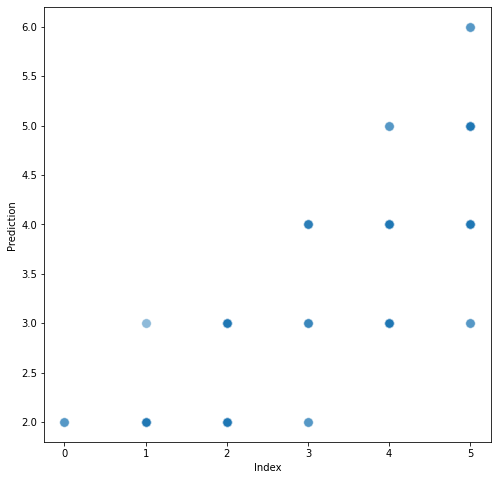

In [81]:
plt.figure(figsize=[8,8])
plt.ylabel("Prediction")
sns.scatterplot(y=round_prediction, x=Y_test, alpha=0.5, s=90,)